In [1]:
import os
import logging, timeit
from btEngine2.DataLoader import DataLoader
from btEngine2.MarketData import MarketData
from btEngine2.TradingRule import TradingRule

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta



# Define paths and configurations for DataLoader
ticker_csv_path = r'G:\Projects\BackTesting1.0\Data\Inputs\TickerList-Futs.csv'
save_directory = r"G:\Projects\BackTesting1.0\Data\Bloomberg\Futures"
helper_directory = r'G:\Projects\BackTesting1.0\Data\Bloomberg\HelperFiles'



# Define paths to auxiliary data for MarketData
tick_values_path = os.path.join(helper_directory, 'fut_val_pt.parquet')
fx_rates_path = os.path.join(helper_directory, 'fxHist.parquet')

# Initialize the MarketData
market_data = MarketData(
    base_directory=save_directory,
    tick_values_path=tick_values_path,
    fx_rates_path=fx_rates_path,
    instrument_type="Futures",
    n_threads=8,  # Number of threads for parallel data loading
    log_level=logging.ERROR  # Set to DEBUG for more detailed logs
)


In [2]:
tick = 'XTD1 Curncy'
# Access data for a specific ticker
try:
    test_df = market_data.get_ticker_data(tick)
    print(test_df)
except ValueError as e:
    print(e)

# Access all preprocessed data
all_data = market_data.get_data()
print(f"Total tickers loaded: {len(all_data)}")

# Access FX rates
fx_rates = market_data.get_fx_rates()
# Access tick values
tick_values = market_data.get_tick_values()
# Access asset classes
asset_classes = market_data.get_asset_classes()

#market_data = market_data.date_filter(start_date='01012010')

shape: (2_371, 14)
┌────────────┬────────┬────────┬────────┬───┬─────────┬─────────┬─────────────────┬────────────────┐
│ Date       ┆ Open   ┆ High   ┆ Low    ┆ … ┆ BadOHLC ┆ FX_Rate ┆ Tick_Value_Base ┆ Tick_Value_USD │
│ ---        ┆ ---    ┆ ---    ┆ ---    ┆   ┆ ---     ┆ ---     ┆ ---             ┆ ---            │
│ date       ┆ f64    ┆ f64    ┆ f64    ┆   ┆ bool    ┆ f64     ┆ f64             ┆ f64            │
╞════════════╪════════╪════════╪════════╪═══╪═════════╪═════════╪═════════════════╪════════════════╡
│ 2015-09-01 ┆ null   ┆ null   ┆ null   ┆ … ┆ false   ┆ 1.0     ┆ 100000.0        ┆ 100000.0       │
│ 2015-09-02 ┆ null   ┆ null   ┆ null   ┆ … ┆ false   ┆ 1.0     ┆ 100000.0        ┆ 100000.0       │
│ 2015-09-03 ┆ null   ┆ null   ┆ null   ┆ … ┆ false   ┆ 1.0     ┆ 100000.0        ┆ 100000.0       │
│ 2015-09-04 ┆ null   ┆ null   ┆ null   ┆ … ┆ false   ┆ 1.0     ┆ 100000.0        ┆ 100000.0       │
│ 2015-09-07 ┆ null   ┆ null   ┆ null   ┆ … ┆ false   ┆ 1.0     ┆ 100000

In [3]:
cmp_asst = 'US1 Comdty'
main_asst = 'NQ1 Index'

main_df = market_data.get_ticker_data(main_asst).to_pandas()
cmp_df = market_data.get_ticker_data(cmp_asst).to_pandas()

main_df.set_index('Date', inplace=True)
cmp_df.set_index('Date', inplace=True)

main_df

,Open,High,Low,Close,Volume,Name,Descr,Carry_Close,Carry,BadOHLC,FX_Rate,Tick_Value_Base,Tick_Value_USD
Date,,,,,,,,,,,,,
1999-06-21,NaN,NaN,NaN,NaN,2136.0,NQ1 Index,NASDAQ 100 E-MINI,NaN,NaN,False,1.0,20.0,20.0
1999-06-22,4598.50,4616.50,4544.5,4549.00,4430.0,NQ1 Index,NASDAQ 100 E-MINI,NaN,NaN,False,1.0,20.0,20.0
1999-06-23,4546.50,4571.00,4521.5,4565.50,4625.0,NQ1 Index,NASDAQ 100 E-MINI,4127.25,NaN,False,1.0,20.0,20.0
1999-06-24,4566.50,4569.50,4515.0,4524.50,4395.0,NQ1 Index,NASDAQ 100 E-MINI,4086.25,NaN,False,1.0,20.0,20.0
1999-06-25,4522.50,4559.00,4500.5,4521.50,2751.0,NQ1 Index,NASDAQ 100 E-MINI,4083.25,NaN,False,1.0,20.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07,20220.00,20267.25,19948.0,19992.75,450371.0,NQ1 Index,NASDAQ 100 E-MINI,20209.00,-827.266484,False,1.0,20.0,20.0
2024-10-08,20025.75,20329.50,19902.5,20298.50,444750.0,NQ1 Index,NASDAQ 100 E-MINI,20515.75,-834.536401,False,1.0,20.0,20.0
2024-10-09,20294.25,20482.75,20196.0,20463.50,421249.0,NQ1 Index,NASDAQ 100 E-MINI,20685.00,-844.313187,False,1.0,20.0,20.0


In [4]:
cmp_df

,Open,High,Low,Close,Volume,Name,Descr,Carry_Close,Carry,BadOHLC,FX_Rate,Tick_Value_Base,Tick_Value_USD
Date,,,,,,,,,,,,,
1980-01-02,-41.87500,-41.87500,-43.09375,-43.06250,6297.0,US1 Comdty,US LONG BOND(CBT),-29.84375,NaN,False,1.0,1000.0,1000.0
1980-01-03,-43.46875,-43.34375,-43.93750,-43.43750,7949.0,US1 Comdty,US LONG BOND(CBT),-30.25000,NaN,False,1.0,1000.0,1000.0
1980-01-04,-43.62500,-43.15625,-43.93750,-43.81250,7021.0,US1 Comdty,US LONG BOND(CBT),-30.56250,NaN,False,1.0,1000.0,1000.0
1980-01-07,-44.50000,-43.62500,-44.50000,-43.68750,7523.0,US1 Comdty,US LONG BOND(CBT),-30.43750,NaN,False,1.0,1000.0,1000.0
1980-01-08,-43.53125,-43.00000,-43.78125,-43.15625,9528.0,US1 Comdty,US LONG BOND(CBT),-29.93750,NaN,False,1.0,1000.0,1000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07,121.93750,122.25000,121.21875,121.31250,441169.0,US1 Comdty,US LONG BOND(CBT),121.59375,-1.331774,False,1.0,1000.0,1000.0
2024-10-08,121.31250,121.65625,120.75000,121.12500,370046.0,US1 Comdty,US LONG BOND(CBT),121.40625,-1.347442,False,1.0,1000.0,1000.0
2024-10-09,121.43750,121.50000,120.53125,120.78125,397770.0,US1 Comdty,US LONG BOND(CBT),121.06250,-1.316106,False,1.0,1000.0,1000.0


In [5]:
import pandas as pd
# Extract 'Close' column from main_df and rename it to 'Main_Close'
main_close_df = main_df[['Close']].rename(columns={'Close': 'Main_Close'})

# Extract 'Close' column from cmp_df and rename it to 'Cmp_Close'
cmp_close_df = cmp_df[['Close']].rename(columns={'Close': 'Cmp_Close'})

# Concatenate main_close_df and cmp_close_df
concat_df = pd.concat([main_close_df, cmp_close_df], axis=1)


In [6]:
concat_df

,Main_Close,Cmp_Close
Date,,
1980-01-02,NaN,-43.06250
1980-01-03,NaN,-43.43750
1980-01-04,NaN,-43.81250
1980-01-07,NaN,-43.68750
1980-01-08,NaN,-43.15625
...,...,...
2024-10-07,19992.75,121.31250
2024-10-08,20298.50,121.12500
2024-10-09,20463.50,120.78125


<Axes: xlabel='Date'>

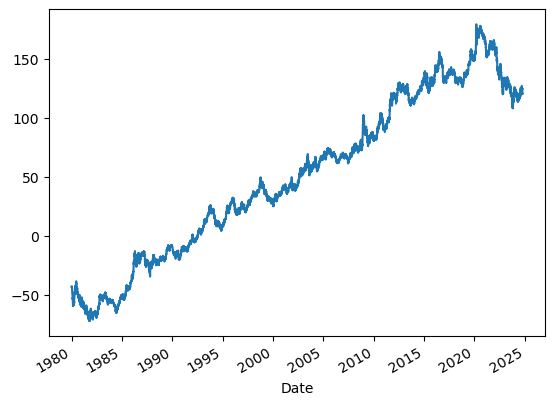

In [7]:
concat_df['Cmp_Close'].plot()

<Axes: xlabel='Date'>

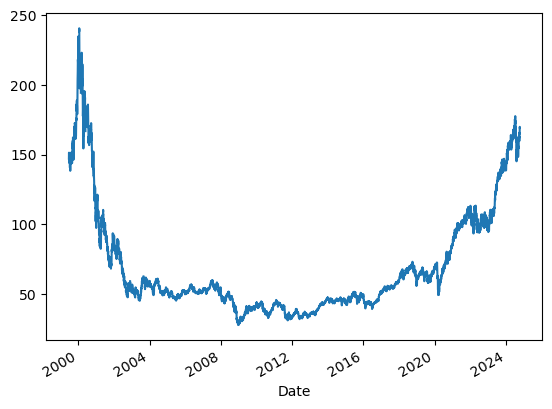

In [8]:
from btEngine2.Indicators import *

concat_df['Ratio'] = concat_df['Main_Close'] / concat_df['Cmp_Close']
concat_df['RSI_Spread'] = compute_rsi(concat_df['Ratio'], 2)

concat_df['Ratio'].plot()

<Axes: xlabel='Date'>

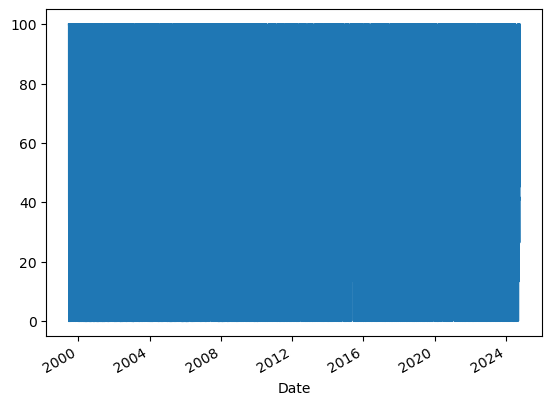

In [9]:
concat_df['RSI_Spread'].plot()

In [10]:
merged_df = pd.concat([main_df, concat_df], axis=1)
merged_df['SMA_50'] = merged_df['Close'].rolling(window=200).mean()

merged_df['Prev_High'] = merged_df['High'].shift(1)

In [11]:
merged_df

,Open,High,Low,Close,Volume,Name,Descr,Carry_Close,Carry,BadOHLC,FX_Rate,Tick_Value_Base,Tick_Value_USD,Main_Close,Cmp_Close,Ratio,RSI_Spread,SMA_50,Prev_High
Date,,,,,,,,,,,,,,,,,,,
1980-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-43.06250,NaN,NaN,NaN,NaN
1980-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-43.43750,NaN,NaN,NaN,NaN
1980-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-43.81250,NaN,NaN,NaN,NaN
1980-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-43.68750,NaN,NaN,NaN,NaN
1980-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-43.15625,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07,20220.00,20267.25,19948.0,19992.75,450371.0,NQ1 Index,NASDAQ 100 E-MINI,20209.00,-827.266484,False,1.0,20.0,20.0,19992.75,121.31250,164.803709,78.984322,19063.21750,20263.75
2024-10-08,20025.75,20329.50,19902.5,20298.50,444750.0,NQ1 Index,NASDAQ 100 E-MINI,20515.75,-834.536401,False,1.0,20.0,20.0,20298.50,121.12500,167.583075,72.848529,19077.28000,20267.25
2024-10-09,20294.25,20482.75,20196.0,20463.50,421249.0,NQ1 Index,NASDAQ 100 E-MINI,20685.00,-844.313187,False,1.0,20.0,20.0,20463.50,120.78125,169.426132,100.000000,19091.21625,20329.50


,Close,Daily_Change,Tick_Value_USD,Daily_PnL,Rolling_21d_EWM_Stdev_PnL,NumLots
Date,,,,,,
2000-03-29,6643.50,-194.00,20.0,-3880.0,43692.012452,230.0
2000-03-30,6502.50,-141.00,20.0,-2820.0,43619.445437,230.0
2000-03-31,6632.50,130.00,20.0,2600.0,43753.623311,230.0
2000-04-03,6310.00,-322.50,20.0,-6450.0,51364.338607,195.0
2000-04-04,6241.00,-69.00,20.0,-1380.0,49101.232783,205.0
...,...,...,...,...,...,...
2024-10-07,19992.75,-234.50,20.0,-4690.0,67300.528070,150.0
2024-10-08,20298.50,305.75,20.0,6115.0,70035.769325,145.0
2024-10-09,20463.50,165.00,20.0,3300.0,67908.199249,145.0


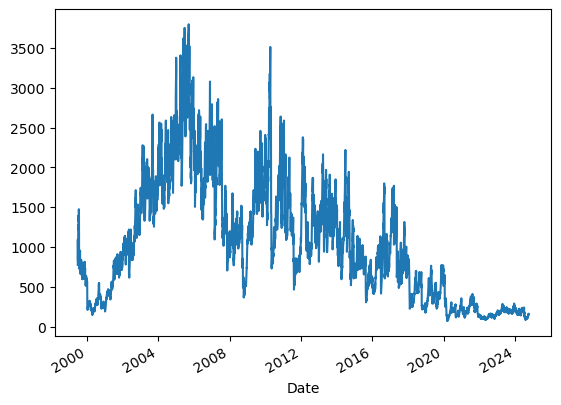

In [12]:
merged_df['Daily_Change'] = merged_df['Close'].diff()
# Calculate the daily $ PnL using the 'Tick_Value_USD'
merged_df['Daily_PnL'] = merged_df['Daily_Change'] * merged_df['Tick_Value_USD']

# Display the updated DataFrame
merged_df[['Close', 'Daily_Change', 'Tick_Value_USD', 'Daily_PnL']]

# Calculate the rolling 21-day exponentially weighted moving standard deviation of Daily_PnL
merged_df['Rolling_21d_EWM_Stdev_PnL'] = merged_df['Daily_PnL'].ewm(span=21).std() * np.sqrt(252)

# Display the updated DataFrame with the new column
merged_df[['Close', 'Daily_Change', 'Tick_Value_USD', 'Daily_PnL', 'Rolling_21d_EWM_Stdev_PnL']]

# Calculate the number of contracts to trade for a constant volatility position
initial_capital = 10000000
merged_df['NumLots'] = initial_capital / merged_df['Rolling_21d_EWM_Stdev_PnL']
merged_df['NumLots'] = (merged_df['NumLots'] / 5).round() * 5
# Display the updated DataFrame with the new column
merged_df[['Close', 'Daily_Change', 'Tick_Value_USD', 'Daily_PnL', 'Rolling_21d_EWM_Stdev_PnL', 'NumLots']]
merged_df['NumLots'].plot()

# Forward fill missing values
merged_df.ffill(inplace=True)

# Drop rows with infinite values
merged_df.replace([np.inf, -np.inf], np.nan, inplace=True)
merged_df.dropna(inplace=True)

# Display the cleaned DataFrame
merged_df[['Close', 'Daily_Change', 'Tick_Value_USD', 'Daily_PnL', 'Rolling_21d_EWM_Stdev_PnL', 'NumLots']]

In [13]:
merged_df['const_vol_pnl'] = merged_df['Daily_PnL'] * merged_df['NumLots']
merged_df['const_vol_pos'] = merged_df['const_vol_pnl'].cumsum()
merged_df

,Open,High,Low,Close,Volume,Name,Descr,Carry_Close,Carry,BadOHLC,...,Ratio,RSI_Spread,SMA_50,Prev_High,Daily_Change,Daily_PnL,Rolling_21d_EWM_Stdev_PnL,NumLots,const_vol_pnl,const_vol_pos
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-29,6835.00,6853.00,6631.0,6643.50,30696.0,NQ1 Index,NASDAQ 100 E-MINI,5578.25,4302.788462,False,...,204.219020,0.000000,5357.21250,7012.50,-194.00,-3880.0,43692.012452,230.0,-892400.0,-892400.0
2000-03-30,6641.50,6733.00,6386.5,6502.50,32339.0,NQ1 Index,NASDAQ 100 E-MINI,5437.25,4296.771978,False,...,193.382900,0.000000,5366.98000,6853.00,-141.00,-2820.0,43619.445437,230.0,-648600.0,-1541000.0
2000-03-31,6503.00,6661.00,6420.5,6632.50,30146.0,NQ1 Index,NASDAQ 100 E-MINI,5565.25,4291.758242,False,...,194.358974,8.263280,5377.31500,6733.00,130.00,2600.0,43753.623311,230.0,598000.0,-943000.0
2000-04-03,6592.00,6592.00,6263.5,6310.00,35070.0,NQ1 Index,NASDAQ 100 E-MINI,5241.75,4287.245879,False,...,184.233577,8.792300,5386.24250,6661.00,-322.50,-6450.0,51364.338607,195.0,-1257750.0,-2200750.0
2000-04-04,6303.00,6387.00,5870.0,6241.00,44126.0,NQ1 Index,NASDAQ 100 E-MINI,5175.75,4281.229396,False,...,177.679715,0.000000,5394.84000,6592.00,-69.00,-1380.0,49101.232783,205.0,-282900.0,-2483650.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07,20220.00,20267.25,19948.0,19992.75,450371.0,NQ1 Index,NASDAQ 100 E-MINI,20209.00,-827.266484,False,...,164.803709,78.984322,19063.21750,20263.75,-234.50,-4690.0,67300.528070,150.0,-703500.0,187847050.0
2024-10-08,20025.75,20329.50,19902.5,20298.50,444750.0,NQ1 Index,NASDAQ 100 E-MINI,20515.75,-834.536401,False,...,167.583075,72.848529,19077.28000,20267.25,305.75,6115.0,70035.769325,145.0,886675.0,188733725.0
2024-10-09,20294.25,20482.75,20196.0,20463.50,421249.0,NQ1 Index,NASDAQ 100 E-MINI,20685.00,-844.313187,False,...,169.426132,100.000000,19091.21625,20329.50,165.00,3300.0,67908.199249,145.0,478500.0,189212225.0


In [14]:

# 4. Initialize Trading Signal Columns
merged_df['Signal'] = 0
merged_df['TradeEntry'] = np.nan
merged_df['TradeExit'] = np.nan
merged_df['InTrade'] = 0
merged_df['Holding_Period'] = 0

# 5. Define Trading Parameters
N = 5  # Holding period in days
rsi_threshold = 10.0  # RSI threshold for entry
merged_df.reset_index(inplace=True)
# 6. Trading Logic Implementation
df_list = merged_df.to_dict('records')

position_open = False
holding_period = 0

for i, row in enumerate(df_list):
    try:
        if not position_open:
            # Entry condition: Close_main < Prev_High and RSI_Spread < rsi_threshold
            if (row['Close'] < row['Prev_High']) and (row['RSI_Spread'] < rsi_threshold) and (row['SMA_50'] < row['Close']):
                # Enter long position
                position_open = True
                holding_period = 1
                df_list[i]['Signal'] = 1
                df_list[i]['TradeEntry'] = df_list[i+1]['Open']
                df_list[i]['InTrade'] = 0
                df_list[i]['Holding_Period'] = holding_period
                print(f"Trade Entry on {df_list[i+1]['Date'].date()} at Open: {df_list[i+1]['Open']}")
        else:
            # Update holding period
            holding_period += 1
            df_list[i]['Holding_Period'] = holding_period
            df_list[i]['InTrade'] = 1
            # Exit conditions:
            # 1. Close_main > previous day's Close_main
            # 2. Holding period >= N
            exit_condition = False
            
            if i > 0 and row['Close'] > df_list[i-1]['Close']:
                exit_condition = True
            if holding_period >= N:
                exit_condition = True
            
            if exit_condition:
                # Exit position
                position_open = False
                df_list[i]['Signal'] = -1
                df_list[i]['TradeExit'] = df_list[i+1]['Open']
                df_list[i]['InTrade'] = 1
                df_list[i]['Holding_Period'] = 0
                print(f"Trade Exit on {df_list[i+1]['Date'].date()} at Open: {df_list[i+1]['Open']}")
    except:
        continue
# Convert back to DataFrame
final_df = pd.DataFrame(df_list)

Trade Entry on 2000-03-30 at Open: 6641.5
Trade Exit on 2000-04-03 at Open: 6592.0
Trade Entry on 2000-04-04 at Open: 6303.0
Trade Exit on 2000-04-07 at Open: 6343.5
Trade Entry on 2000-04-14 at Open: 5768.0
Trade Exit on 2000-04-18 at Open: 5759.0
Trade Entry on 2000-04-21 at Open: 5805.0
Trade Exit on 2000-04-26 at Open: 5825.0
Trade Entry on 2000-05-10 at Open: 5623.0
Trade Exit on 2000-05-12 at Open: 5577.5
Trade Entry on 2000-06-07 at Open: 5855.0
Trade Exit on 2000-06-08 at Open: 5931.5
Trade Entry on 2000-06-26 at Open: 5857.5
Trade Exit on 2000-06-27 at Open: 5949.0
Trade Entry on 2000-06-28 at Open: 5886.5
Trade Exit on 2000-06-29 at Open: 5936.5
Trade Entry on 2000-07-05 at Open: 5978.0
Trade Exit on 2000-07-07 at Open: 5956.0
Trade Entry on 2000-07-11 at Open: 5945.5
Trade Exit on 2000-07-13 at Open: 6055.0
Trade Entry on 2000-07-20 at Open: 6035.0
Trade Exit on 2000-07-21 at Open: 6170.0
Trade Entry on 2000-07-24 at Open: 6054.0
Trade Exit on 2000-07-26 at Open: 6010.5
Trad

In [15]:
final_df

final_df['Trade_Price'] = np.where(~final_df['TradeEntry'].isna(), final_df['TradeEntry'],
                                   np.where(~final_df['TradeExit'].isna(), final_df['TradeExit'],
                                            final_df['Close']))

final_df['Trade_PnL_1lot'] = final_df['Trade_Price'].diff()
final_df['Trade_PnL_1lot'] = np.where(~final_df['TradeEntry'].isna() & ~final_df['TradeExit'].isna(),
                                      final_df['TradeExit'] - final_df['TradeEntry'],
                                      final_df['Trade_PnL_1lot'])

final_df['Trade_PnL'] = final_df['Trade_PnL_1lot'] * final_df['NumLots'] * final_df['InTrade']


<Axes: xlabel='Date'>

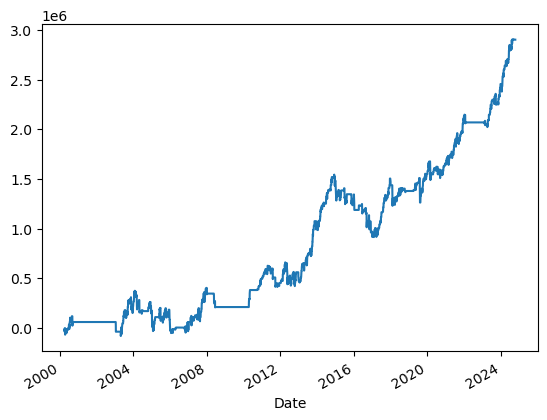

In [16]:
final_df['Strategy_PnL'] = final_df['Trade_PnL'].cumsum()  

final_df.set_index('Date', inplace=True)
final_df['Strategy_PnL'].plot()

In [17]:
final_df

,Open,High,Low,Close,Volume,Name,Descr,Carry_Close,Carry,BadOHLC,...,const_vol_pos,Signal,TradeEntry,TradeExit,InTrade,Holding_Period,Trade_Price,Trade_PnL_1lot,Trade_PnL,Strategy_PnL
Date,,,,,,,,,,,,,,,,,,,,,
2000-03-29,6835.00,6853.00,6631.0,6643.50,30696.0,NQ1 Index,NASDAQ 100 E-MINI,5578.25,4302.788462,False,...,-892400.0,1,6641.5,NaN,0,1,6641.50,NaN,NaN,NaN
2000-03-30,6641.50,6733.00,6386.5,6502.50,32339.0,NQ1 Index,NASDAQ 100 E-MINI,5437.25,4296.771978,False,...,-1541000.0,0,NaN,NaN,1,2,6502.50,-139.00,-31970.0,-31970.00
2000-03-31,6503.00,6661.00,6420.5,6632.50,30146.0,NQ1 Index,NASDAQ 100 E-MINI,5565.25,4291.758242,False,...,-943000.0,-1,NaN,6592.0,1,0,6592.00,89.50,20585.0,-11385.00
2000-04-03,6592.00,6592.00,6263.5,6310.00,35070.0,NQ1 Index,NASDAQ 100 E-MINI,5241.75,4287.245879,False,...,-2200750.0,1,6303.0,NaN,0,1,6303.00,-289.00,-0.0,-11385.00
2000-04-04,6303.00,6387.00,5870.0,6241.00,44126.0,NQ1 Index,NASDAQ 100 E-MINI,5175.75,4281.229396,False,...,-2483650.0,0,NaN,NaN,1,2,6241.00,-62.00,-12710.0,-24095.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-10-07,20220.00,20267.25,19948.0,19992.75,450371.0,NQ1 Index,NASDAQ 100 E-MINI,20209.00,-827.266484,False,...,187847050.0,0,NaN,NaN,0,0,19992.75,-234.50,-0.0,2901166.25
2024-10-08,20025.75,20329.50,19902.5,20298.50,444750.0,NQ1 Index,NASDAQ 100 E-MINI,20515.75,-834.536401,False,...,188733725.0,0,NaN,NaN,0,0,20298.50,305.75,0.0,2901166.25
2024-10-09,20294.25,20482.75,20196.0,20463.50,421249.0,NQ1 Index,NASDAQ 100 E-MINI,20685.00,-844.313187,False,...,189212225.0,0,NaN,NaN,0,0,20463.50,165.00,0.0,2901166.25


In [18]:
final_df['Raw_DailyPnL'] = final_df['Daily_PnL'] * final_df['NumLots']
final_df['Const_Pos'] = final_df['Raw_DailyPnL'].cumsum()


In [19]:

import plotly.graph_objects as go

fig = go.Figure()

# Add Const_Pos trace
fig.add_trace(go.Scatter(x=final_df.index, y=final_df['Const_Pos'], name='Const_Pos', yaxis='y1'))

# Add Strategy_PnL trace
fig.add_trace(go.Scatter(x=final_df.index, y=final_df['Strategy_PnL'], name='Strategy_PnL', yaxis='y2'))

# Create axis objects
fig.update_layout(
    yaxis=dict(
        title="Const_Pos",
        titlefont=dict(
            color="#1f77b4"
        ),
        tickfont=dict(
            color="#1f77b4"
        )
    ),
    yaxis2=dict(
        title="Strategy_PnL",
        titlefont=dict(
            color="#ff7f0e"
        ),
        tickfont=dict(
            color="#ff7f0e"
        ),
        anchor="x",
        overlaying="y",
        side="right"
    ),
    title="Const_Pos and Strategy_PnL Over Time"
)

fig.show()

In [20]:
final_df.to_clipboard()